In [19]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from wordcloud import WordCloud
from textblob import TextBlob
from transformers import BertModel,BertTokenizer,AdamW,get_linear_schedule_with_warmup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

df = pd.read_csv("C:/NLP/data/iran.csv",delimiter=',')
df.info()

cpu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  526 non-null    object
 1   label     527 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df['Comments'] = df['Comments'].fillna("")

In [21]:

import string
import contractions


df['Comments'] = df['Comments'].str.lower()
df['Comments'].head(10)


0     how to stop the war stop the media escalating it
1    ww1 : history books ww2 : history books ww3 : ...
2    let the politicians go to war and soldiers tak...
3    we'll be praying for the peace of everyone.......
4    we are praying that this won't go too far. ble...
5                 this year is going to be interesting
6    usa vs iran = iraq suffers war freaks should f...
7    sort it out like men. have a boxing match inst...
8    3:00 - she said “i hope the revenge continues....
9    they shot that plane down the evidence is in i...
Name: Comments, dtype: object

In [22]:
### removing contractions
def remove_punctuations(text):
    return text.translate(str.maketrans("","",string.punctuation))

        
df['Comments'] = df['Comments'].apply(remove_punctuations)
df['Comments'].head(10)

0     how to stop the war stop the media escalating it
1    ww1  history books ww2  history books ww3  you...
2    let the politicians go to war and soldiers tak...
3    well be praying for the peace of everyonefrom ...
4    we are praying that this wont go too far bless...
5                 this year is going to be interesting
6    usa vs iran  iraq suffers war freaks should fi...
7    sort it out like men have a boxing match inste...
8    300  she said “i hope the revenge continues” t...
9    they shot that plane down the evidence is in i...
Name: Comments, dtype: object

In [23]:
def expand_contractions(text):
    return contractions.fix(text)



df['Comments'] = df['Comments'].apply(expand_contractions)


In [24]:
## removing stopwords

sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['Comments'] = df['Comments'].apply(remove_stopwords)

df['Comments'].head(10)

0                       stop war stop media escalating
1    ww1 history books ww2 history books ww3 youtub...
2       let politicians go war soldiers take rest time
3          well praying peace everyonefrom philippines
4            praying go far blessings everyone hungary
5                               year going interesting
6    usa vs iran iraq suffers war freaks fight wars...
7               sort like men boxing match instead war
8    300 said “ hope revenge continues ” iran shoot...
9                             shot plane evidence self
Name: Comments, dtype: object

In [25]:
### Lemmatizing the text
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

lemma = WordNetLemmatizer()


def lemmatize_text(text):
    tokens=  word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(text) for token in tokens]
    return " ".join(lemma_tokens)


df['Comments'] = df['Comments'].apply(lemmatize_text)

df['Comments'].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    stop war stop media escalating stop war stop m...
1    ww1 history books ww2 history books ww3 youtub...
2    let politicians go war soldiers take rest time...
3    well praying peace everyonefrom philippines we...
4    praying go far blessings everyone hungary pray...
5    year going interesting year going interesting ...
6    usa vs iran iraq suffers war freaks fight wars...
7    sort like men boxing match instead war sort li...
8    300 said “ hope revenge continues ” iran shoot...
9    shot plane evidence self shot plane evidence s...
Name: Comments, dtype: object

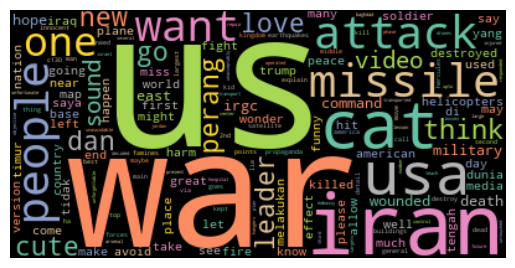

In [26]:
df['Comments'] = df['Comments'].str.replace('"','')

sample_txt = " ".join(i for i in df['Comments'])

wc = WordCloud(colormap="Set2",collocations=False).generate(sample_txt)
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()




In [27]:
## most common words

blob = TextBlob(sample_txt)

most_common_words = nltk.FreqDist(blob.words).most_common(50)
print("top 50 most common words\n",most_common_words)






top 50 most common words
 [('us', 1243), ('iran', 818), ('war', 761), ('could', 478), ('would', 440), ('usa', 408), ('people', 393), ('want', 351), ('1', 314), ('one', 313), ('attack', 311), ('think', 301), ('cat', 296), ('like', 280), ('missiles', 280), ('perang', 260), ('dan', 260), ('love', 256), ('2', 250), ('cute', 247), ('go', 246), ('military', 224), ('east', 221), ('death', 220), ('hope', 211), ('irgc', 208), ('wounded', 208), ('helicopters', 208), ('command', 208), ('destroyed', 208), ('killed', 205), ('cats', 197), ('great', 194), ('media', 193), ('take', 190), ('miss', 190), ('world', 189), ('come', 188), ('peace', 186), ('wonder', 183), ('leaders', 177), ('many', 177), ('trump', 176), ('base', 172), ('video', 171), ('please', 167), ('6', 166), ('funny', 163), ('well', 162), ('near', 161)]


In [28]:
### Time to implement BERT
MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME,do_lower_case=True)



MAX_LEN = 128

class youtube_dataset:
    def __init__(self,Comments,targets,tokenizer,max_len):
        self.Comments = Comments
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.Comments)
    
    def __getitem__(self,idx):
        Comments = str(self.Comments[idx])
        target = self.targets[idx]
        
        
        encoding= self.tokenizer.encode_plus(
            Comments,
            max_length=self.max_len,
            padding="max_length",
            return_attention_mask=True,
            add_special_tokens=True,
            truncation=True,
            return_token_type_ids=False,
            return_tensors="pt",
            )
        
        return {
        "Comments":Comments,
        "input_ids":encoding['input_ids'].flatten(),
        "attention_mask":encoding['attention_mask'].flatten(),
        "targets":torch.tensor(target,dtype=torch.long)
        }
    
    


from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=.50,random_state=42)
df_val,df_test = train_test_split(df_test,test_size=.20,random_state=42)


def get_dataloader(df,tokenizer,max_len,batch_size):
    ds = youtube_dataset(
        Comments = df['Comments'].to_numpy(),
        targets = df['label'].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
        )
    return torch.utils.data.DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
        )



BATCH_SIZE = 12

train_dataloader = get_dataloader(df_train, tokenizer=tokenizer, max_len=MAX_LEN, batch_size=BATCH_SIZE)
test_dataloader = get_dataloader(df_test,tokenizer=tokenizer,max_len=MAX_LEN,batch_size=BATCH_SIZE)
val_dataloader = get_dataloader(df_val, tokenizer=tokenizer, max_len=MAX_LEN, batch_size=BATCH_SIZE)


data = next(iter(train_dataloader))
data.keys()

dict_keys(['Comments', 'input_ids', 'attention_mask', 'targets'])

In [29]:
data['attention_mask'].shape,data['input_ids'].shape

(torch.Size([12, 128]), torch.Size([12, 128]))

In [30]:

n_classes = 2
df['label'].value_counts()

bert_model = BertModel.from_pretrained(MODEL_NAME)

input_ids = data['input_ids']
attention_mask = data['attention_mask']


In [31]:
### nn for Bert Transformer for text classification

class Bert_Classifier(nn.Module):
    def __init__(self, n_classes):
        super(Bert_Classifier,self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        pooled_output = outputs.pooler_output
        output = self.drop(pooled_output)
        return self.out(output)



model = Bert_Classifier(2).to(device)
model

Bert_Classifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [32]:
## normal prep for optimizer,loss,schedulers, all of that

num_epochs = 4
total_steps = len(train_dataloader) * num_epochs


optimizer = AdamW(model.parameters(),lr=2e-5)
loss_fn = nn.CrossEntropyLoss().to(device)
scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps)

In [33]:
################ Training epoc for val and training split and eval model for test split

def training_epoch(model,dataloader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    predictions = 0
    for d in dataloader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        targets = d['targets'].to(device)
        
        outputs = model(
            attention_mask=attention_mask,
            input_ids=input_ids
            )
        _,preds = torch.max(outputs,dim=1)
        loss = loss_fn(outputs,targets)
        predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return (predictions.double() / n_examples,np.mean(losses))




def eval_model(model,dataloader,loss_fn,device,n_examples):
    model = model.eval()
    losses = []
    predictions = 0
    
    
    with torch.no_grad():
        for d in dataloader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            targets = d['targets'].to(device)
            
            outputs = model(
                attention_mask=attention_mask,
                input_ids=input_ids
                )
            
            _,preds = torch.max(outputs,dim=1)
            loss = loss_fn(outputs,targets)
            
            predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
        return (predictions.double() / n_examples,np.mean(losses))



In [34]:
### OK, time to fry my PC!
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(num_epochs):
    print(f'{epoch+1}/{num_epochs}')
    
    train_acc,train_loss = training_epoch(
        model,
        train_dataloader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
        )
    
    
    val_acc,val_loss = training_epoch(
        model,
        val_dataloader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_val)
        )
    
    print(f" Training accuracy {train_acc*100:.2f}%; -Val Accuracy-- {val_acc*100:.2f}%")
    print(f"training loss {train_loss*100:.2f}%; --val loss-- {val_loss*100:.2f}%")



    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

1/4
 Training accuracy 65.64%; -Val Accuracy-- 76.33%
training loss 63.81%; --val loss-- 49.39%
2/4
 Training accuracy 87.64%; -Val Accuracy-- 94.69%
training loss 37.86%; --val loss-- 27.04%
3/4
 Training accuracy 93.44%; -Val Accuracy-- 94.69%
training loss 26.64%; --val loss-- 23.45%
4/4
 Training accuracy 92.66%; -Val Accuracy-- 94.20%
training loss 27.60%; --val loss-- 24.10%


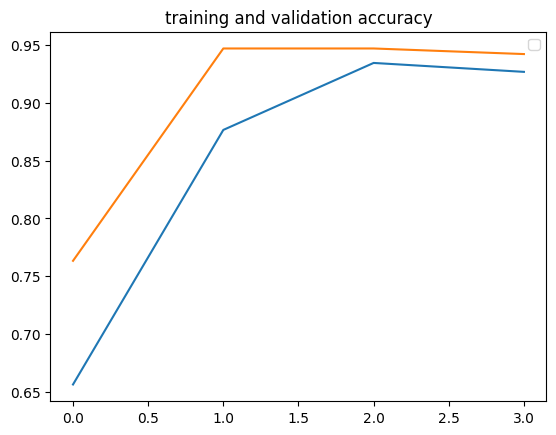

In [36]:
## training and validation accuracy

plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.title("training and validation accuracy")
plt.legend()
plt.show()




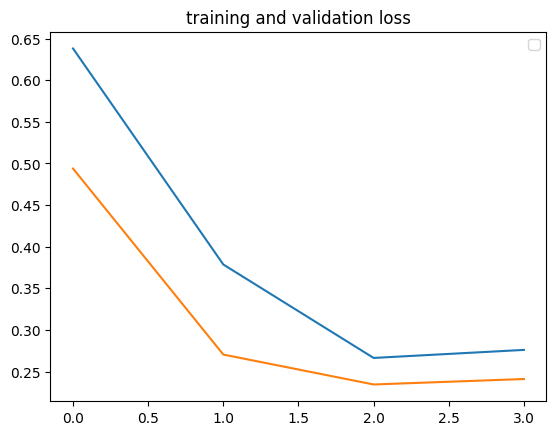

In [37]:
3## training and validation loss 
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.title("training and validation loss")
plt.legend()
plt.show()


In [38]:
### Testing Accuracy

test_acc, _ = eval_model(
  model,
  test_dataloader,
  loss_fn,
  device,
  len(df_test)
)

print(f'Testing Accuracy : {test_acc.item() *100 :.2f}%')


Testing Accuracy : 82.69%


In [ ]:
## I got to BERT in under a year. Happy. There is nothing I do post that I will not do on the spot, that is my only rule for this account
## like, 5000 hours later